Import all necessary libraries. Uploading data for work

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas

lidar_data = pandas.read_csv('Lidar_observation.csv', index_col = 0)
df_meteor = pandas.read_csv('Meteo_data.csv')
lidar_data

,date_started_at,timestamp_started_at,alt_start,Cloud
0,2009-12-14 17:43:27+06:00,1260791007,9000.0,1
1,2009-12-14 17:58:51+06:00,1260791931,7950.0,1
2,2009-12-14 18:13:59+06:00,1260792839,9600.0,1
3,2009-12-19 17:11:38+06:00,1261221098,4950.0,1
4,2009-12-19 17:30:22+06:00,1261222222,4800.0,1
...,...,...,...,...
2391,2024-11-05 10:48:54+07:00,1730778534,0.0,0
2392,2024-11-05 11:09:16+07:00,1730779756,0.0,0
2393,2024-11-05 11:28:49+07:00,1730780929,0.0,0
2394,2024-11-05 11:47:03+07:00,1730782023,0.0,0


Cut for work data

In [2]:
for i in lidar_data.index:
  lidar_data.loc[i,'timestamp_started_at'] = int(lidar_data.loc[i,'timestamp_started_at'])
start_ts = pandas.Timestamp("2010-01-01 00:00:00", tz="UTC")
train_end = pandas.Timestamp("2022-01-01 00:00:00", tz="UTC")
data_df = lidar_data.loc[(lidar_data['timestamp_started_at'] >= int(start_ts.timestamp())) & (lidar_data['timestamp_started_at'] < int(train_end.timestamp()))].copy()
data_df

,date_started_at,timestamp_started_at,alt_start,Cloud
9,2010-01-21 19:02:36+06:00,1264078956,9900.0,1
10,2010-01-28 17:35:45+06:00,1264678545,10950.0,1
11,2010-01-28 17:51:18+06:00,1264679478,10650.0,1
12,2010-01-28 18:06:33+06:00,1264680393,10500.0,1
13,2010-01-28 18:21:46+06:00,1264681306,10800.0,1
...,...,...,...,...
2228,2021-06-16 10:28:53+07:00,1623814133,0.0,0
2229,2021-06-16 14:27:27+07:00,1623828447,0.0,0
2230,2021-06-21 11:07:19+07:00,1624248439,0.0,0
2231,2021-10-06 14:13:32+07:00,1633504412,0.0,0


Matching meteorogical and lidar obervation. Programm find nearst at time meteorogical observation for fixed lidar observation

In [3]:
meteo_timestamp = []
meteo_date = []
meteo_class = []
tcc = []
for i in data_df.index:
  for j in range(len(df_meteor.index)):
    if int(df_meteor.loc[j,'timestamp']) - int(data_df.loc[i,'timestamp_started_at']) > 0:
      if abs(int(df_meteor.loc[j,'timestamp']) - int(data_df.loc[i,'timestamp_started_at'])) < abs(int(df_meteor.loc[j-1,'timestamp']) - int(data_df.loc[i,'timestamp_started_at'])):
        meteo_timestamp.append(df_meteor.loc[j,'timestamp'])
        meteo_date.append(df_meteor.loc[j,'date'])
        meteo_class.append(int(df_meteor.loc[j,'HLC']))
        tcc.append(int(df_meteor.loc[j,'Общее количество облачности']))
      else:
        meteo_timestamp.append(df_meteor.loc[j-1,'timestamp'])
        meteo_date.append(df_meteor.loc[j-1,'date'])
        meteo_class.append(int(df_meteor.loc[j-1,'HLC']))
        tcc.append(int(df_meteor.loc[j-1,'Общее количество облачности']))
      break
data_df['Meteo_timestamp'] = meteo_timestamp
data_df['Meteo_date'] = meteo_date
data_df['Meteo_cloud'] = meteo_class
data_df['tcc'] = tcc
diff = []
for i in data_df.index:
  diff.append(int(data_df.loc[i,'Meteo_timestamp']) - int(data_df.loc[i,'timestamp_started_at']))
data_df['difference'] = diff
data_df

,date_started_at,timestamp_started_at,alt_start,Cloud,Meteo_timestamp,Meteo_date,Meteo_cloud,tcc,difference
9,2010-01-21 19:02:36+06:00,1264078956,9900.0,1,1264075200,2010-01-21 12:00:00,0,0,-3756
10,2010-01-28 17:35:45+06:00,1264678545,10950.0,1,1264680000,2010-01-28 12:00:00,0,0,1455
11,2010-01-28 17:51:18+06:00,1264679478,10650.0,1,1264680000,2010-01-28 12:00:00,0,0,522
12,2010-01-28 18:06:33+06:00,1264680393,10500.0,1,1264680000,2010-01-28 12:00:00,0,0,-393
13,2010-01-28 18:21:46+06:00,1264681306,10800.0,1,1264680000,2010-01-28 12:00:00,0,0,-1306
...,...,...,...,...,...,...,...,...,...
2228,2021-06-16 10:28:53+07:00,1623814133,0.0,0,1623812400,2021-06-16 03:00:00,0,2,-1733
2229,2021-06-16 14:27:27+07:00,1623828447,0.0,0,1623823200,2021-06-16 06:00:00,0,3,-5247
2230,2021-06-21 11:07:19+07:00,1624248439,0.0,0,1624244400,2021-06-21 03:00:00,0,0,-4039
2231,2021-10-06 14:13:32+07:00,1633504412,0.0,0,1633500000,2021-10-06 06:00:00,1,2,-4412


Clipping data that is far apart in time. For a cloudless or high atmosphere, the interval is 65 minutes, for clouds below 8 km, 35 minutes.

In [5]:
data_df = data_df.loc[data_df['Meteo_cloud']<=1].copy()
data_df = data_df.loc[((abs(data_df['difference'])<3900)&(data_df['Cloud']==0))|((abs(data_df['difference'])<3900)&(data_df['Cloud']==1)&(data_df['alt_start']<8000))
                      |((abs(data_df['difference'])<2100)&(data_df['Cloud']==1)&(data_df['alt_start']>8000))].copy()
data_df

,date_started_at,timestamp_started_at,alt_start,Cloud,Meteo_timestamp,Meteo_date,Meteo_cloud,tcc,difference
10,2010-01-28 17:35:45+06:00,1264678545,10950.0,1,1264680000,2010-01-28 12:00:00,0,0,1455
11,2010-01-28 17:51:18+06:00,1264679478,10650.0,1,1264680000,2010-01-28 12:00:00,0,0,522
12,2010-01-28 18:06:33+06:00,1264680393,10500.0,1,1264680000,2010-01-28 12:00:00,0,0,-393
13,2010-01-28 18:21:46+06:00,1264681306,10800.0,1,1264680000,2010-01-28 12:00:00,0,0,-1306
14,2010-02-01 18:19:57+06:00,1265026797,7350.0,1,1265025600,2010-02-01 12:00:00,0,0,-1197
...,...,...,...,...,...,...,...,...,...
2224,2021-06-11 10:17:59+07:00,1623381479,0.0,0,1623380400,2021-06-11 03:00:00,0,3,-1079
2225,2021-06-16 09:25:58+07:00,1623810358,0.0,0,1623812400,2021-06-16 03:00:00,0,2,2042
2226,2021-06-16 09:52:45+07:00,1623811965,0.0,0,1623812400,2021-06-16 03:00:00,0,2,435
2227,2021-06-16 10:10:28+07:00,1623813028,0.0,0,1623812400,2021-06-16 03:00:00,0,2,-628


Ploting hist for total cloud cover at four different situation

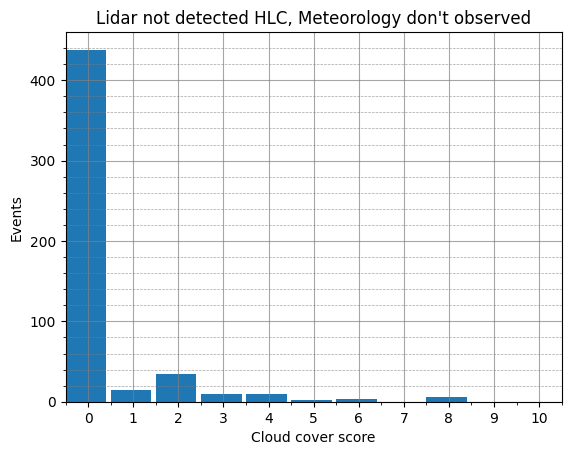

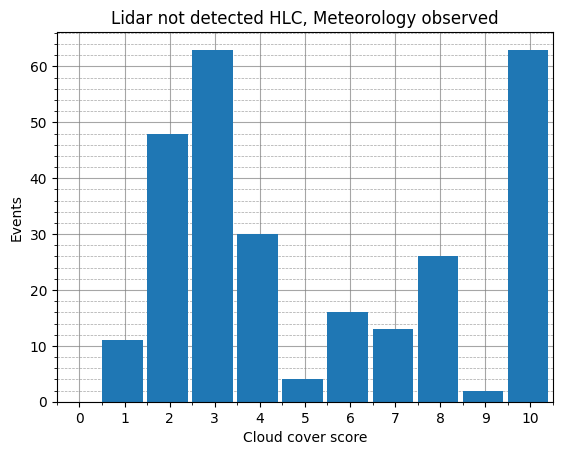

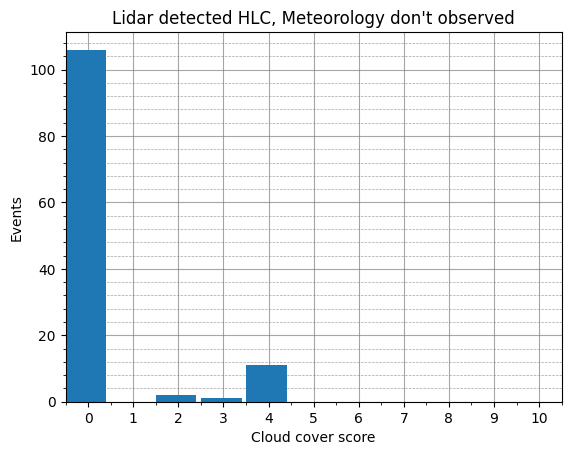

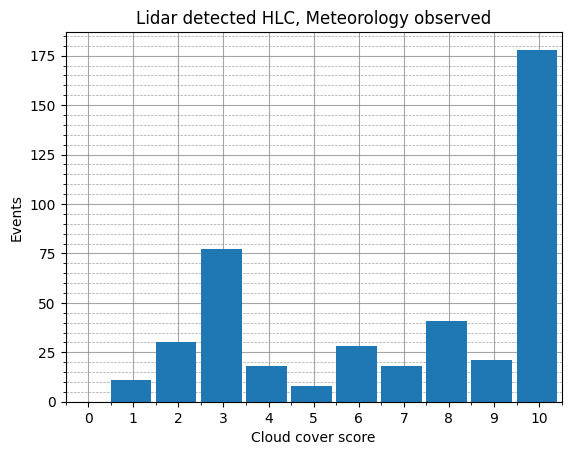

In [9]:
from matplotlib.ticker import AutoMinorLocator
for i in [[0,0,"Lidar not detected HLC, Meteorology don't observed"],[0,1,"Lidar not detected HLC, Meteorology observed"],[1,0,"Lidar detected HLC, Meteorology don't observed"],[1,1,"Lidar detected HLC, Meteorology observed"]]:
  data_work = data_df.loc[((data_df['Cloud']==i[0]))&(data_df['Meteo_cloud']==i[1])]
  fig, ax = plt.subplots()
  ax.hist(data_work['tcc'],bins = np.arange(0,12),width = 0.9,align = 'left')
  plt.minorticks_on()
  plt.xlim(-0.5,10.5)
  plt.ylabel('Events')
  plt.xlabel('Cloud cover score')
  plt.title(i[2])
  plt.rcParams['axes.axisbelow'] = True
  plt.xticks(np.arange(0,11))
  plt.grid(color='gray', linestyle='-', linewidth=0.8, alpha=0.7, which='major', axis='both', zorder=0)
  plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7, which='minor', axis='y', zorder=0)
  ax.xaxis.set_minor_locator(AutoMinorLocator(2))
  ax.yaxis.set_minor_locator(AutoMinorLocator(5))
  #plt.savefig(str(i[0])+str(i[1])+'.jpg')

Table Pirson test

In [10]:
lidar_0_meteo_0 = len(data_df.loc[(data_df['Cloud']==0)&(data_df['Meteo_cloud']==0)].index)
lidar_0_meteo_1 = len(data_df.loc[(data_df['Cloud']==0)&(data_df['Meteo_cloud']==1)].index)
lidar_1_meteo_0 = len(data_df.loc[(data_df['Cloud']==1)&(data_df['Meteo_cloud']==0)].index)
lidar_1_meteo_1 = len(data_df.loc[(data_df['Cloud']==1)&(data_df['Meteo_cloud']==1)].index)
lidar_0 = len(data_df.loc[(data_df['Cloud']==0)].index)
lidar_1 = len(data_df.loc[(data_df['Cloud']==1)].index)
meteo_0 = len(data_df.loc[(data_df['Meteo_cloud']==0)].index)
meteo_1 = len(data_df.loc[(data_df['Meteo_cloud']==1)].index)
n = len(data_df.index)
observ_table = pandas.DataFrame(data = {
    'meteo_0':[lidar_0_meteo_0,lidar_1_meteo_0],
    'meteo_1':[lidar_0_meteo_1,lidar_1_meteo_1]
},index = ['lidar_0','lidar_1'])
estim_table = pandas.DataFrame(data = {
    'meteo_0':[lidar_0*meteo_0/n,lidar_1*meteo_0/n],
    'meteo_1':[lidar_0*meteo_1/n,lidar_1*meteo_1/n]
},index = ['lidar_0','lidar_1'])
khi_sqr = 0
for i in observ_table.index:
  for j in observ_table.columns:
    khi_sqr += (observ_table.loc[i,j] - estim_table.loc[i,j])**2/estim_table.loc[i,j]
print(khi_sqr)

245.6738781195226


In [11]:
print(observ_table)
print(estim_table)

         meteo_0  meteo_1
lidar_0      518      276
lidar_1      120      430
           meteo_0    meteo_1
lidar_0  376.91369  417.08631
lidar_1  261.08631  288.91369


Khi-squared test for not filtrred data

<BarContainer object of 2 artists> <BarContainer object of 2 artists>


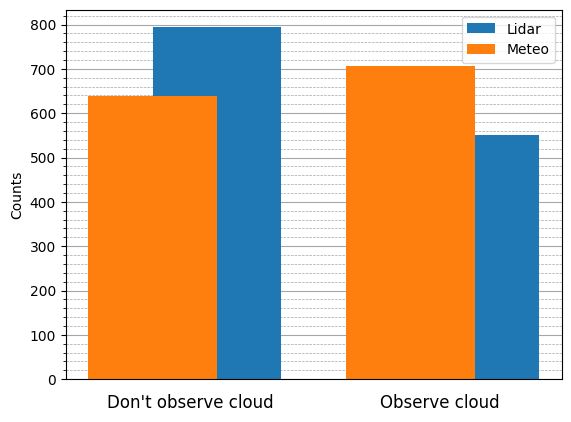

72.61445558446633


In [12]:
plt.grid(color='gray', linestyle='-', linewidth=0.8, alpha=0.7, which='major', axis='y', zorder=0)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7, which='minor', axis='y', zorder=0)
a = plt.bar(x = [0,1], height=[lidar_0, lidar_1], label = 'Lidar', width = 0.5,align = 'edge')
b = plt.bar(x = [0,1], height=[meteo_0, meteo_1], label = 'Meteo',width = 0.5)
plt.legend(loc = 'best')
plt.minorticks_on()
plt.ylabel('Counts')
plt.rcParams['axes.axisbelow'] = True
plt.xticks([])
print(a,b)
plt.figtext(0.32, 0.05, "Don't observe cloud",
            wrap=True, horizontalalignment='center', fontsize=12, color='black')
plt.figtext(0.71, 0.05, "Observe cloud",
            wrap=True, horizontalalignment='center', fontsize=12, color='black')
plt.show()

khi_sqr = (lidar_0-meteo_0)**2/meteo_0 + (lidar_1-meteo_1)**2/meteo_1
print(khi_sqr)

TCC filter and cheking

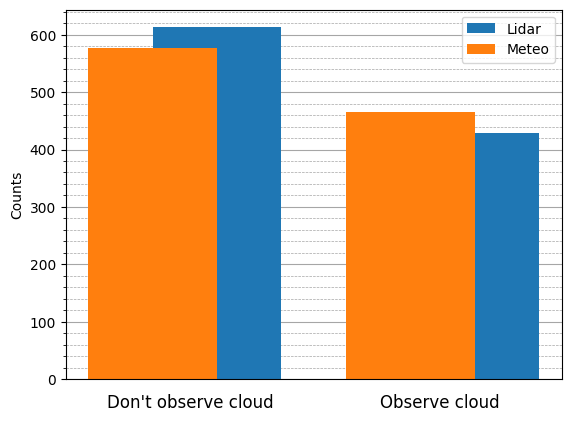

5.314504351454459


In [14]:
data_df_filter = data_df.loc[(data_df['tcc']<=0)|(data_df['tcc']>=4)].copy()
lidar_0_meteo_0 = len(data_df_filter.loc[(data_df_filter['Cloud']==0)&(data_df_filter['Meteo_cloud']==0)].index)
lidar_0_meteo_1 = len(data_df_filter.loc[(data_df_filter['Cloud']==0)&(data_df_filter['Meteo_cloud']==1)].index)
lidar_1_meteo_0 = len(data_df_filter.loc[(data_df_filter['Cloud']==1)&(data_df_filter['Meteo_cloud']==0)].index)
lidar_1_meteo_1 = len(data_df_filter.loc[(data_df_filter['Cloud']==1)&(data_df_filter['Meteo_cloud']==1)].index)
lidar_0 = len(data_df_filter.loc[(data_df_filter['Cloud']==0)].index)
lidar_1 = len(data_df_filter.loc[(data_df_filter['Cloud']==1)].index)
meteo_0 = len(data_df_filter.loc[(data_df_filter['Meteo_cloud']==0)].index)
meteo_1 = len(data_df_filter.loc[(data_df_filter['Meteo_cloud']==1)].index)
n = len(data_df_filter.index)
plt.grid(color='gray', linestyle='-', linewidth=0.8, alpha=0.7, which='major', axis='y', zorder=0)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7, which='minor', axis='y', zorder=0)
plt.bar(x = [0,1], height=[lidar_0, lidar_1], label = 'Lidar', width = 0.5,align = 'edge')
plt.bar(x = [0,1], height=[meteo_0, meteo_1], label = 'Meteo',width = 0.5)
plt.legend(loc = 'best')
plt.rcParams['axes.axisbelow'] = True
plt.minorticks_on()
plt.ylabel('Counts')
plt.rcParams['axes.axisbelow'] = True
plt.xticks([])
plt.figtext(0.32, 0.05, "Don't observe cloud",
            wrap=True, horizontalalignment='center', fontsize=12, color='black')
plt.figtext(0.71, 0.05, "Observe cloud",
            wrap=True, horizontalalignment='center', fontsize=12, color='black')
plt.show()
khi_sqr = (lidar_0-meteo_0)**2/meteo_0 + (lidar_1-meteo_1)**2/meteo_1
print(khi_sqr)